## Comment Toxicity Classification using Deep Learning

Data source : https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data?select=train.csv.zip

### 0. Install Dependencies and Bring in Data

In [1]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

2024-10-07 15:03:12.324812: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv(os.path.join('data', 'train.csv'))

In [3]:
df.iloc[3]['comment_text']

'"\nMore\nI can\'t make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It\'s listed in the relevant form eg Wikipedia:Good_article_nominations#Transport  "'

In [4]:
df[df.columns[2:]].iloc[6]

toxic            1
severe_toxic     1
obscene          1
threat           0
insult           1
identity_hate    0
Name: 6, dtype: int64

### 1. Preprocess

In [5]:
from tensorflow.keras.layers import TextVectorization

In [6]:
TextVectorization?

Init signature:
TextVectorization(
    max_tokens=None,
    standardize='lower_and_strip_punctuation',
    split='whitespace',
    ngrams=None,
    output_mode='int',
    output_sequence_length=None,
    pad_to_max_tokens=False,
    vocabulary=None,
    idf_weights=None,
    sparse=False,
    ragged=False,
    **kwargs,
)
Docstring:     
A preprocessing layer which maps text features to integer sequences.

This layer has basic options for managing text in a Keras model. It
transforms a batch of strings (one example = one string) into either a list
of token indices (one example = 1D tensor of integer token indices) or a
dense representation (one example = 1D tensor of float values representing
data about the example's tokens). This layer is meant to handle natural
language inputs. To handle simple string inputs (categorical strings or
pre-tokenized strings) see `tf.keras.layers.StringLookup`.

The vocabulary for the layer must be either supplied on construction or
learned via `adapt()`.

In [7]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [8]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [9]:
df['comment_text']

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [10]:
df[df.columns[2:]].values

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [11]:
X

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [12]:
y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [74]:
MAX_FEATURES = 1000 # number of words in the vocab

In [75]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                           output_sequence_length=100,
                           output_mode='int')

In [76]:
vectorizer.adapt(X.values)

In [77]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'have',
 'are',
 'your',
 'with',
 'if',
 'article',
 'was',
 'or',
 'but',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'about',
 'me',
 'so',
 'wikipedia',
 'can',
 'what',
 'there',
 'all',
 'has',
 'will',
 'talk',
 'please',
 'would',
 'its',
 'no',
 'one',
 'just',
 'like',
 'they',
 'he',
 'dont',
 'which',
 'any',
 'been',
 'should',
 'more',
 'we',
 'some',
 'other',
 'who',
 'see',
 'here',
 'also',
 'his',
 'think',
 'im',
 'because',
 'know',
 'how',
 'am',
 'people',
 'why',
 'edit',
 'articles',
 'only',
 'out',
 'up',
 'when',
 'were',
 'use',
 'then',
 'may',
 'time',
 'did',
 'them',
 'now',
 'being',
 'their',
 'than',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'had',
 'very',
 'information',
 'does',
 'could',
 'well',
 'want',
 'such',
 'sources',
 'way',
 'name',
 'these',
 'deletion',
 'pages',
 'first',
 'help'

In [78]:
vectorizer("Hello World, life is great")[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([288, 263, 306,   9, 275])>

In [79]:
vectorized_text = vectorizer(X.values)

In [80]:
vectorized_text

<tf.Tensor: shape=(159571, 100), dtype=int64, numpy=
array([[645,  76,   2, ...,   0,   0,   0],
       [  1,  54,   1, ...,   0,   0,   0],
       [425, 441,  70, ...,   0,   0,   0],
       ...,
       [  1,   1, 383, ...,   0,   0,   0],
       [  5,  12, 534, ...,   0,   0,   0],
       [  5,   8, 130, ...,   0,   0,   0]])>

In [81]:
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps prevent bottlenecks

In [82]:
batch_X, batch_y = dataset.as_numpy_iterator().next()

In [83]:
batch_X, batch_X.shape

(array([[  1, 111,  14, ...,   1,   3, 247],
        [ 64,  33,   7, ...,   0,   0,   0],
        [ 48, 198,   5, ...,   0,   0,   0],
        ...,
        [  1,   1,   1, ...,   0,   0,   0],
        [  2,  24,   1, ...,   1, 107,  46],
        [  1, 441,   8, ...,   0,   0,   0]]),
 (16, 100))

In [84]:
batch_y, batch_y.shape

(array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]),
 (16, 6))

In [85]:
len(dataset)

9974

In [86]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [87]:
train_generator = train.as_numpy_iterator()
train_generator.next()

(array([[  1,  52, 165, ...,   0,   0,   0],
        [ 50, 249, 229, ..., 318,  40,  33],
        [ 49, 234,   8, ...,   0,   0,   0],
        ...,
        [  1,   1,   4, ...,  47,  17, 461],
        [563,   1,   8, ...,   0,   0,   0],
        [  2, 281,   1, ...,   0,   0,   0]]),
 array([[0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 0],
        [1, 0, 0, 0, 0, 0]]))

### 2. Create Sequential Model

In [88]:
from tensorflow.keras.layers import LSTM, Dense, Embedding, GlobalMaxPooling1D
from tensorflow.keras.models import Sequential

In [89]:
model = Sequential()
# Create the embedding layer
model.add(Embedding(MAX_FEATURES+1, 16))
# LSTM Layer
model.add(LSTM(8, activation='tanh'))
# Feature extractor fully connected layers
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
# Final layer
model.add(Dense(6, activation='sigmoid'))

In [90]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [91]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 16)          16016     
                                                                 
 lstm_6 (LSTM)               (None, 8)                 800       
                                                                 
 dense_20 (Dense)            (None, 16)                144       
                                                                 
 dense_21 (Dense)            (None, 32)                544       
                                                                 
 dense_22 (Dense)            (None, 16)                528       
                                                                 
 dense_23 (Dense)            (None, 6)                 102       
                                                                 
Total params: 18,134
Trainable params: 18,134
Non-trai

In [92]:
from tensorflow.keras.callbacks import EarlyStopping
# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=2,          # Stop training if no improvement after 3 epochs
    restore_best_weights=True  # Restore the best weights after stopping
)
history = model.fit(train, epochs=10, validation_data=val, callbacks=[early_stopping])

Epoch 1/10
6981/6981 [==============================] - 371s 53ms/step - loss: 0.1405 - val_loss: 0.1088
Epoch 2/10
6981/6981 [==============================] - 353s 50ms/step - loss: 0.1294 - val_loss: 0.1273
Epoch 3/10
6981/6981 [==============================] - 387s 55ms/step - loss: 0.1127 - val_loss: 0.1000
Epoch 4/10
6981/6981 [==============================] - 442s 63ms/step - loss: 0.1175 - val_loss: 0.1119
Epoch 5/10
6981/6981 [==============================] - 495s 71ms/step - loss: 0.0989 - val_loss: 0.1062


In [93]:
history.history

{'loss': [0.1405181884765625,
  0.12940078973770142,
  0.11269721388816833,
  0.1174813061952591,
  0.09888029843568802],
 'val_loss': [0.10877025127410889,
  0.1273379623889923,
  0.09998662769794464,
  0.1119154691696167,
  0.10620532929897308]}

In [94]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

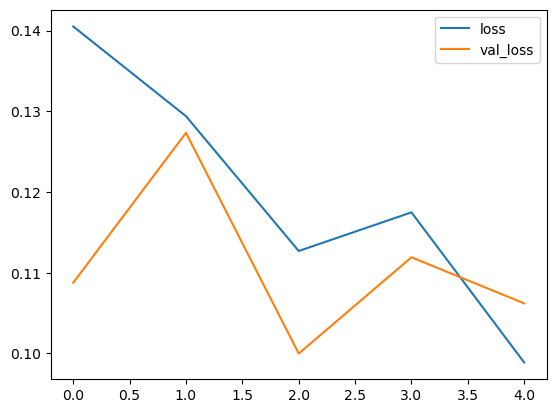

In [95]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

### 3. Make Predictions

In [104]:
input_text = vectorizer('You freaking suck! I am going to hit you!')
input_text

<tf.Tensor: shape=(100,), dtype=int64, numpy=
array([  7,   1, 397,   8,  74, 164,   3,   1,   7,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0])>

In [106]:
res = model.predict(np.expand_dims(input_text, 0))

1/1 [==============================] - 0s 90ms/step


In [107]:
res

array([[0.39248085, 0.05081593, 0.22581889, 0.01453779, 0.23410784,
        0.03990347]], dtype=float32)

In [103]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [108]:
batch = test.as_numpy_iterator().next()

In [109]:
batch

(array([[  9,  41,  30, ...,   0,   0,   0],
        [ 94,   8,  74, ...,   0,   0,   0],
        [196,  52,   6, ...,   1, 364,  10],
        ...,
        [  8, 201,  65, ...,   0,   0,   0],
        [  1,  34,   2, ...,   0,   0,   0],
        [202,   8,  88, ...,   0,   0,   0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

In [110]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [112]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 0s 65ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

### 4. Evaluate Model

In [113]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [114]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [115]:
for batch in test.as_numpy_iterator():
    # Unpack the batch
    X_true, y_true = batch
    # Make a prediction
    yhat = model.predict(X_true)

    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()

    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 32ms/step


In [116]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.8461538553237915, Recall: 0.0032650637440383434, Accuracy:0.27382147312164307


### 5. Test and Gradio

In [117]:
!pip install gradio jinja2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 1.4 MB/s eta 0:00:000:00:01m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 1.4 MB/s eta 0:00:001.4 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 1.3 MB/s eta 0:00:000:00:010:00:0102


In [118]:
import gradio as gr

In [119]:
model.save('toxicity.h5')

In [120]:
model = tf.keras.models.load_model('toxicity.h5')

In [121]:
input_str = vectorizer('hey i freaken hate you!')

In [123]:
res = model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 1s 679ms/step


In [125]:
res 

array([[0.39248076, 0.05081585, 0.22581874, 0.01453778, 0.2341077 ,
        0.03990344]], dtype=float32)

In [126]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [128]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
    return text

In [130]:
interface = gr.Interface(fn=score_comment,
                        inputs=gr.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')

In [131]:
interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://f8cab8e914222ced66.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 34ms/step
